# Generate tile grid for map making

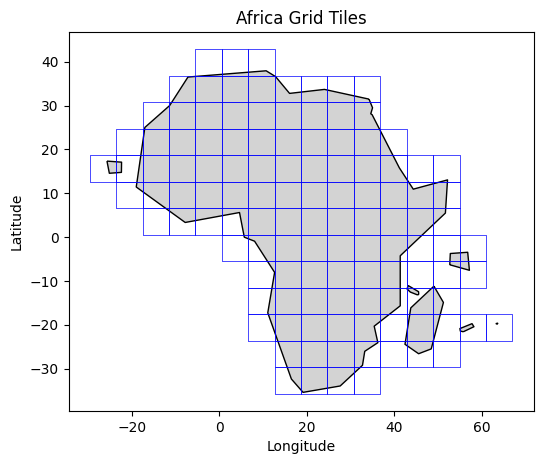

In [8]:
import geopandas as gpd
import shapely.geometry as geom
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ----------------------
# 1. Define tile size and grid parameters
# ----------------------

# Chip size in degrees (approximate, since degrees != km everywhere).
# Better to reproject to equal-area CRS for precision, but WGS84 is ok for scaffolding.
chip_km = 6.72
tile_chips = 100
tile_km = chip_km * tile_chips   # ~672 km

# Convert km → degrees (roughly valid near equator, refine later)
km_per_degree = 111.32  # at equator
tile_deg = tile_km / km_per_degree  # ~6 degrees

# ----------------------
# 2. Generate tile grid
# ----------------------
tiles = []
xmin, ymin, xmax, ymax = -90, -90.0, 90.0, 90.0

xs = np.arange(xmin, xmax, tile_deg)
ys = np.arange(ymin, ymax, tile_deg)

for x in xs:
    for y in ys:
        tile_poly = geom.Polygon([
            (x, y),
            (x + tile_deg, y),
            (x + tile_deg, y + tile_deg),
            (x, y + tile_deg),
            (x, y)
        ])
        tiles.append(tile_poly)

grid = gpd.GeoDataFrame({'geometry': tiles}, crs="EPSG:4326")

# ----------------------
# 3. Load Africa land polygon
# ----------------------

path_to_file = 'simple_africa_shape.json'
with open(path_to_file) as f:
    africa = gpd.read_file(f, driver='GeoJSON').to_crs("EPSG:4326")

# ----------------------
# 4. Filter tiles that intersect Africa
# ----------------------
grid = grid[grid.intersects(africa.unary_union)].reset_index(drop=True)

# Plot the Africa polygon and grid
fig, ax = plt.subplots(figsize=(6, 5))
africa.plot(ax=ax, color='lightgrey', edgecolor='black')
grid.plot(ax=ax, edgecolor='blue', facecolor='none', linewidth=0.5)
plt.title('Africa Grid Tiles')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [6]:
print(grid.iloc[0].geometry)

POLYGON ((-29.633489040603678 12.623068630973748, -23.596837944664045 12.623068630973748, -23.596837944664045 18.65971972691338, -29.633489040603678 18.65971972691338, -29.633489040603678 12.623068630973748))
